## describe data ##

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/car_data.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
data.shape

(11914, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## plt data ##

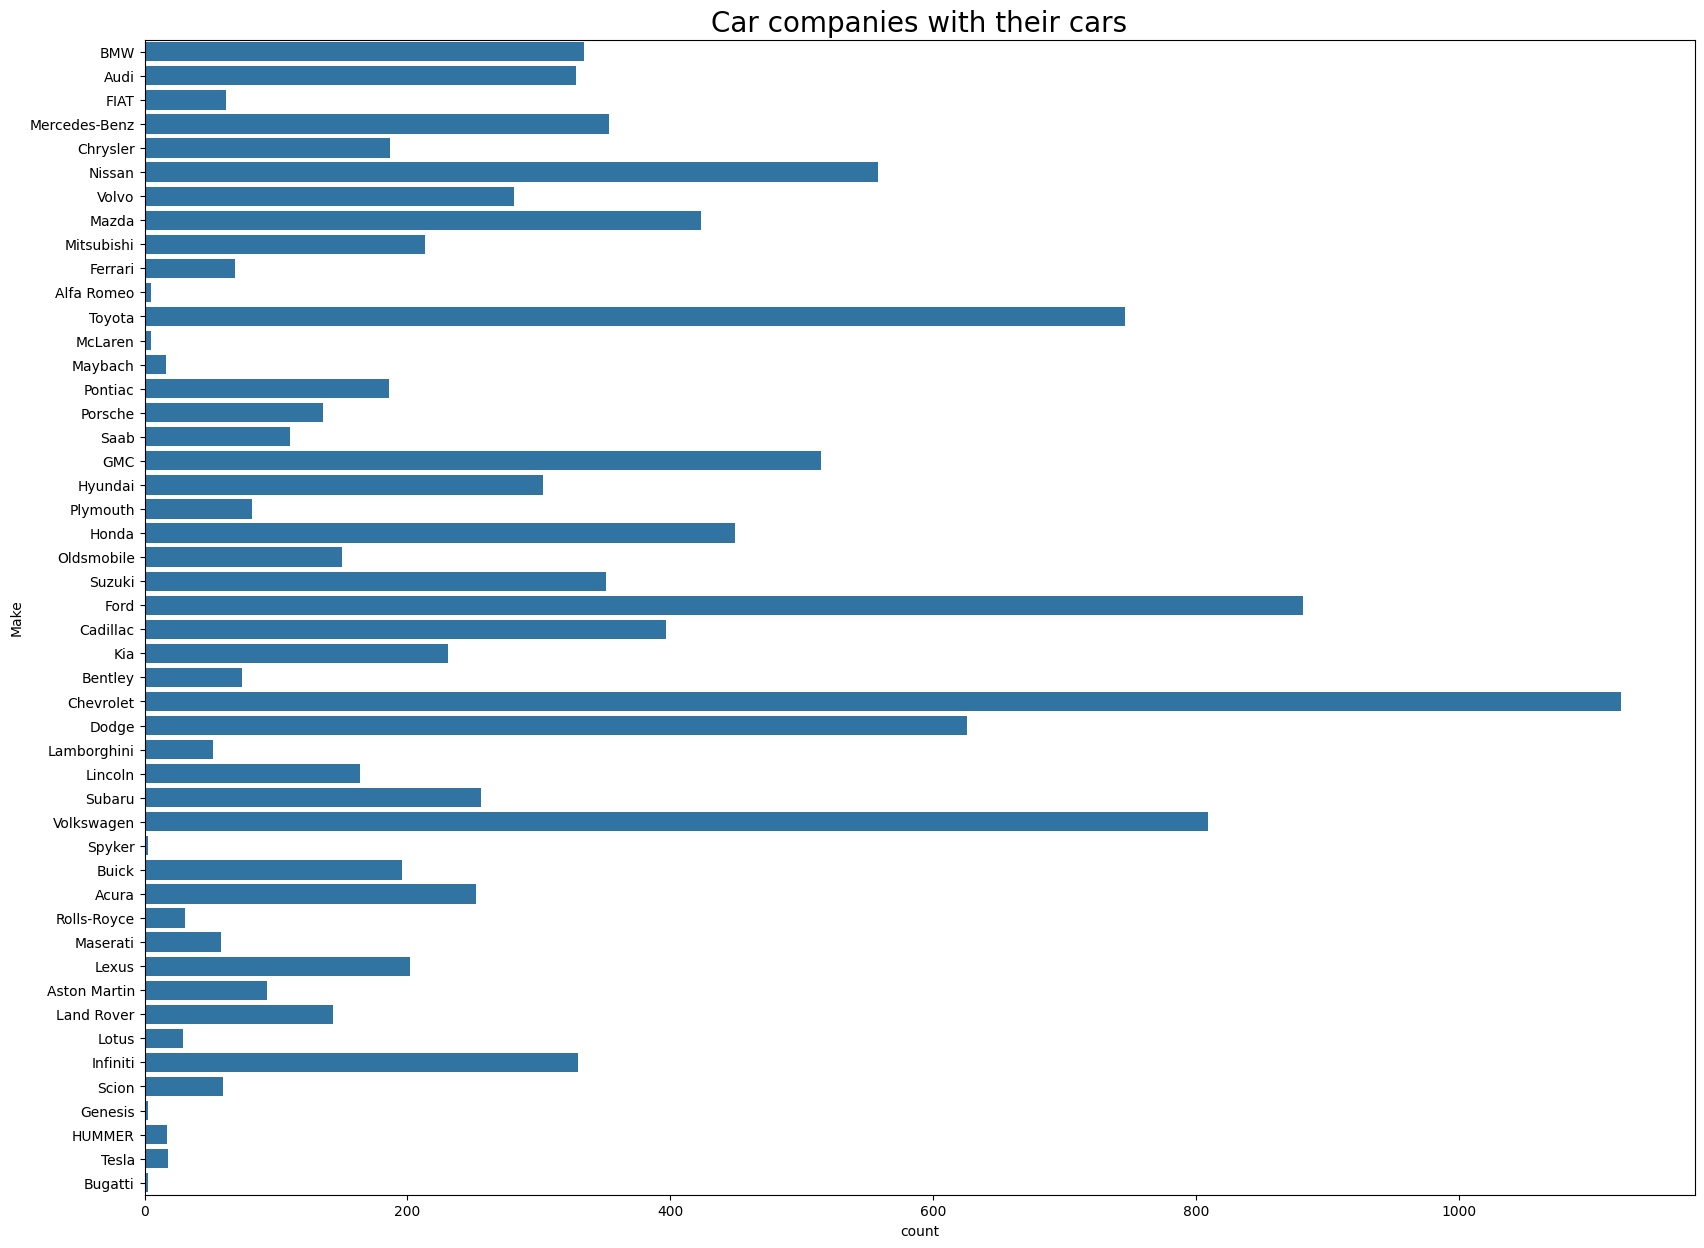

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

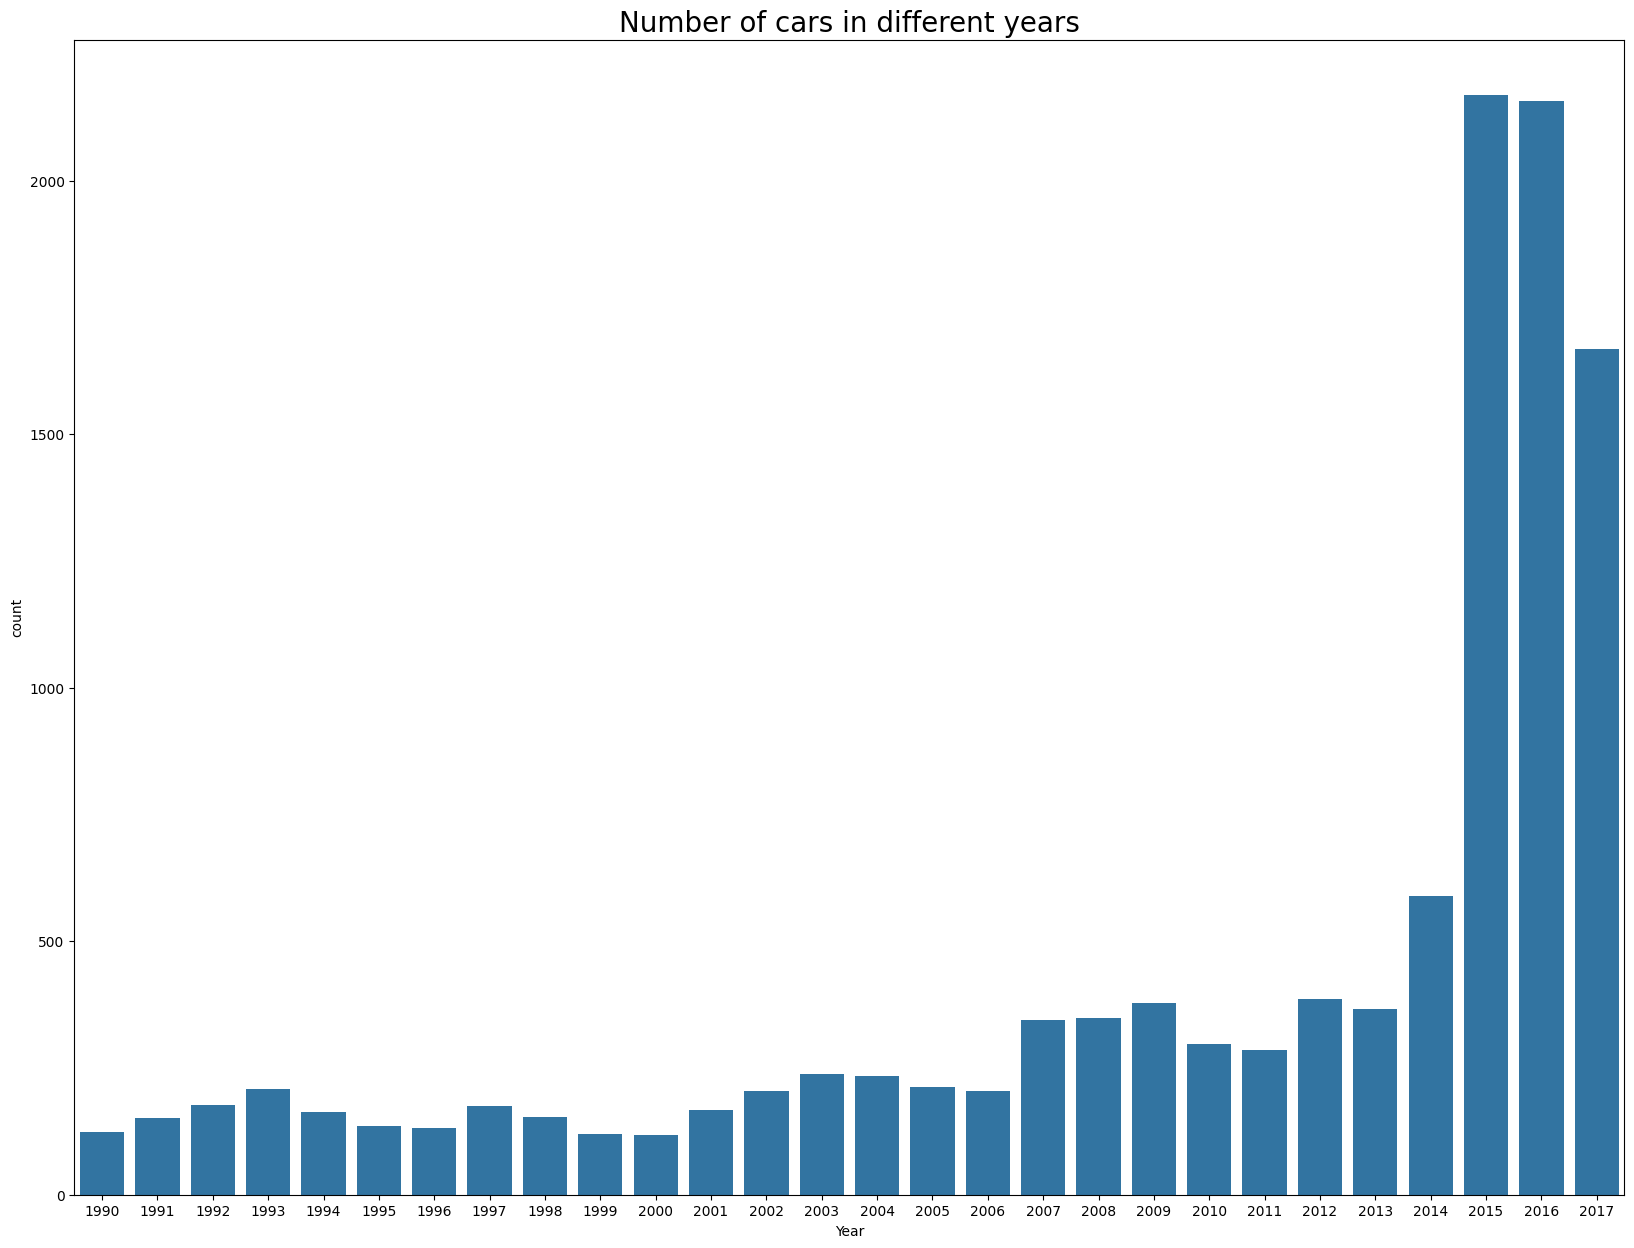

In [6]:
plt.figure(figsize = (20, 15))
sns.countplot(x = data.Year)
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

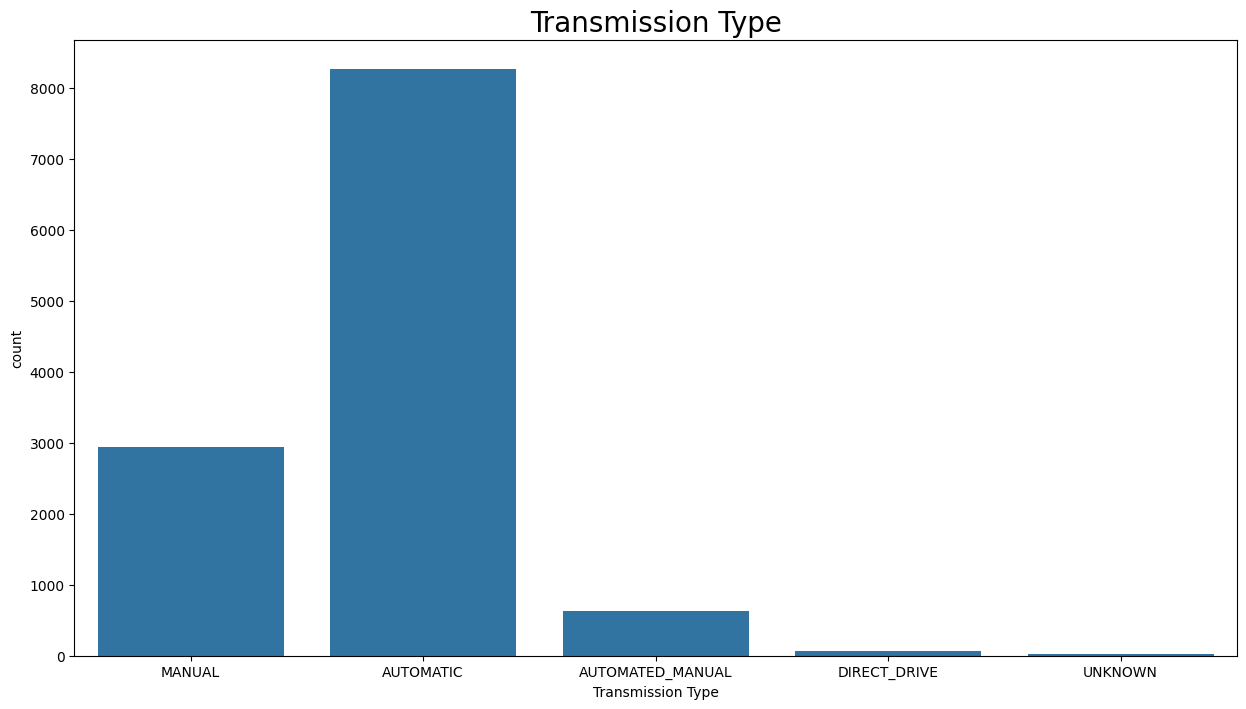

In [7]:
plt.figure(figsize = (15,8))
sns.countplot(x = data['Transmission Type'])
plt.title("Transmission Type", fontsize = 20)
plt.show()

## describe unique data ##

In [8]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

##  find missing value  ##

 total missing value is : Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Axes: >

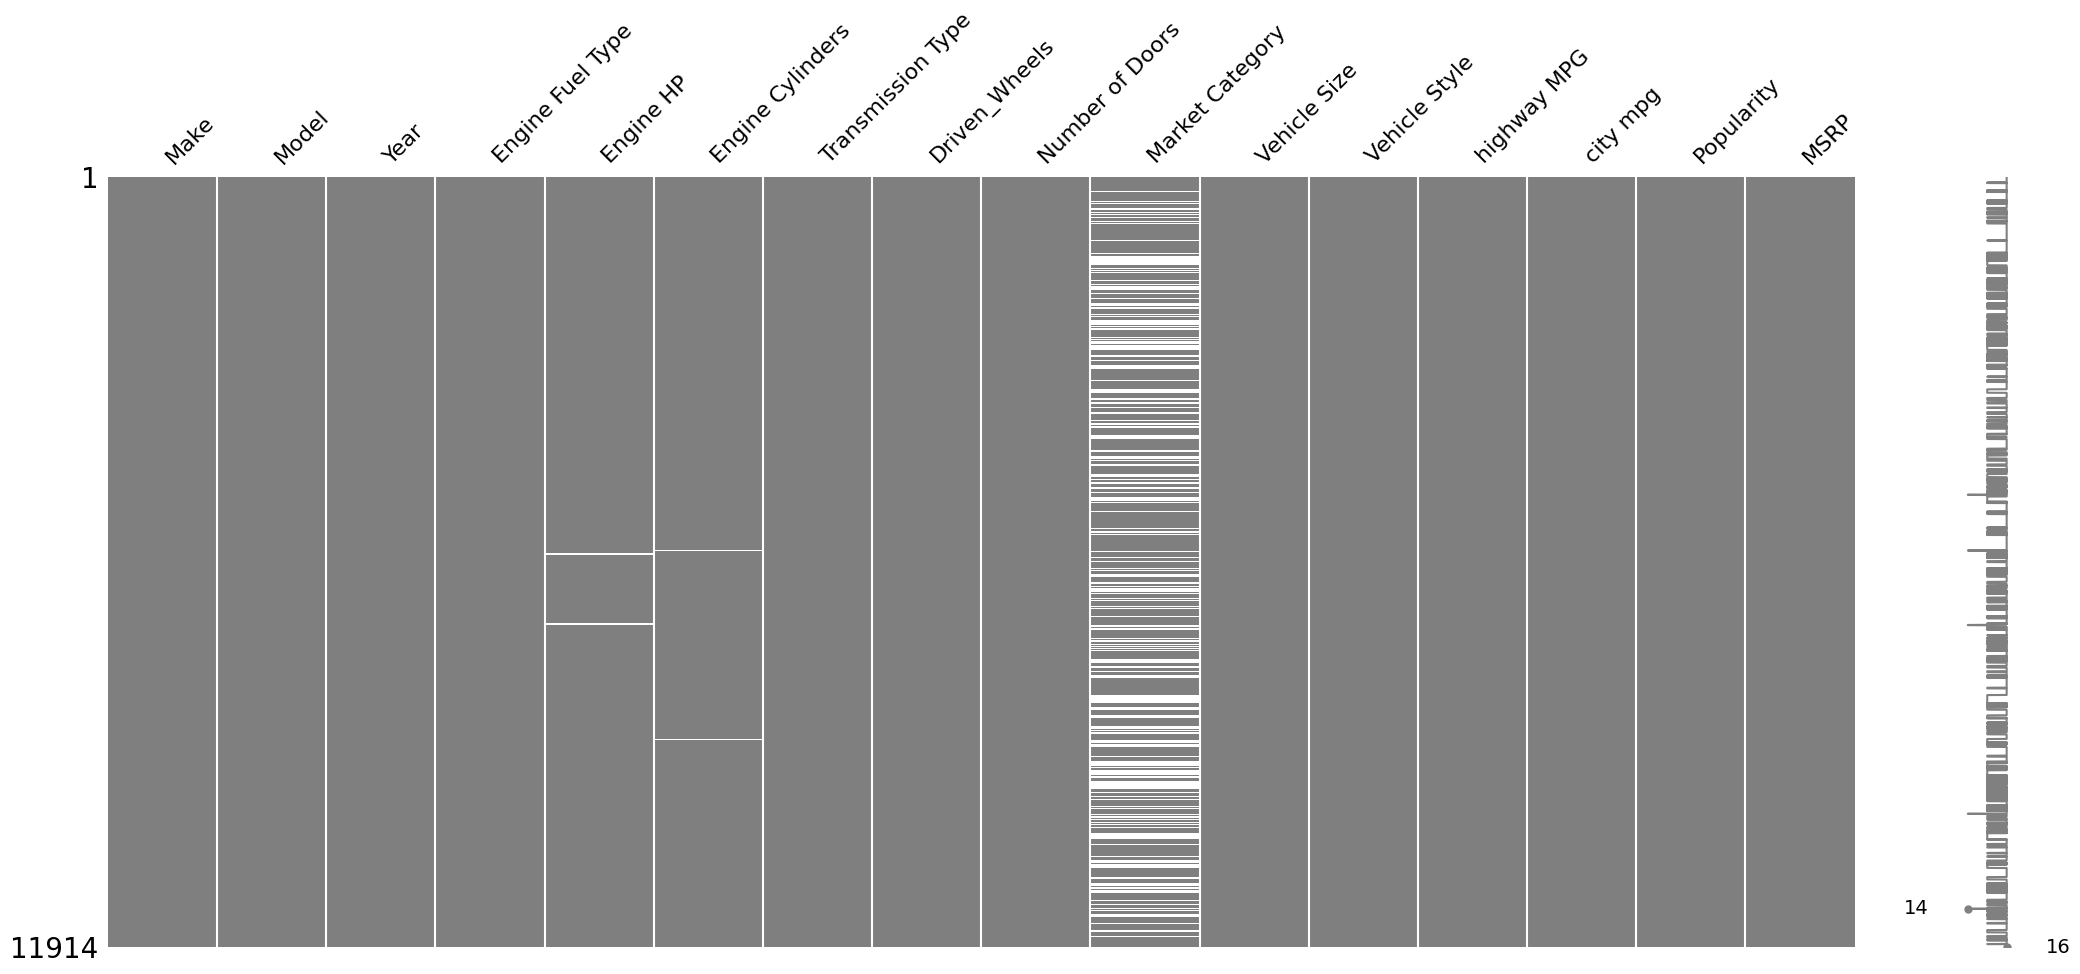

In [9]:
import missingno as msno


df = pd.DataFrame(data)
missing_value = df.isnull().sum()
print(" total missing value is :", missing_value)

msno.matrix(data, color = (0.5, 0.5, 0.5))

## chack corelation cofficient 

In [10]:
corr_data = data[['Engine HP', 'highway MPG', 'city mpg', 'Popularity','Year','Engine Cylinders', 'MSRP']]
corr_matrix = corr_data.corr()
print(corr_matrix["MSRP"].sort_values(ascending=False))


MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64


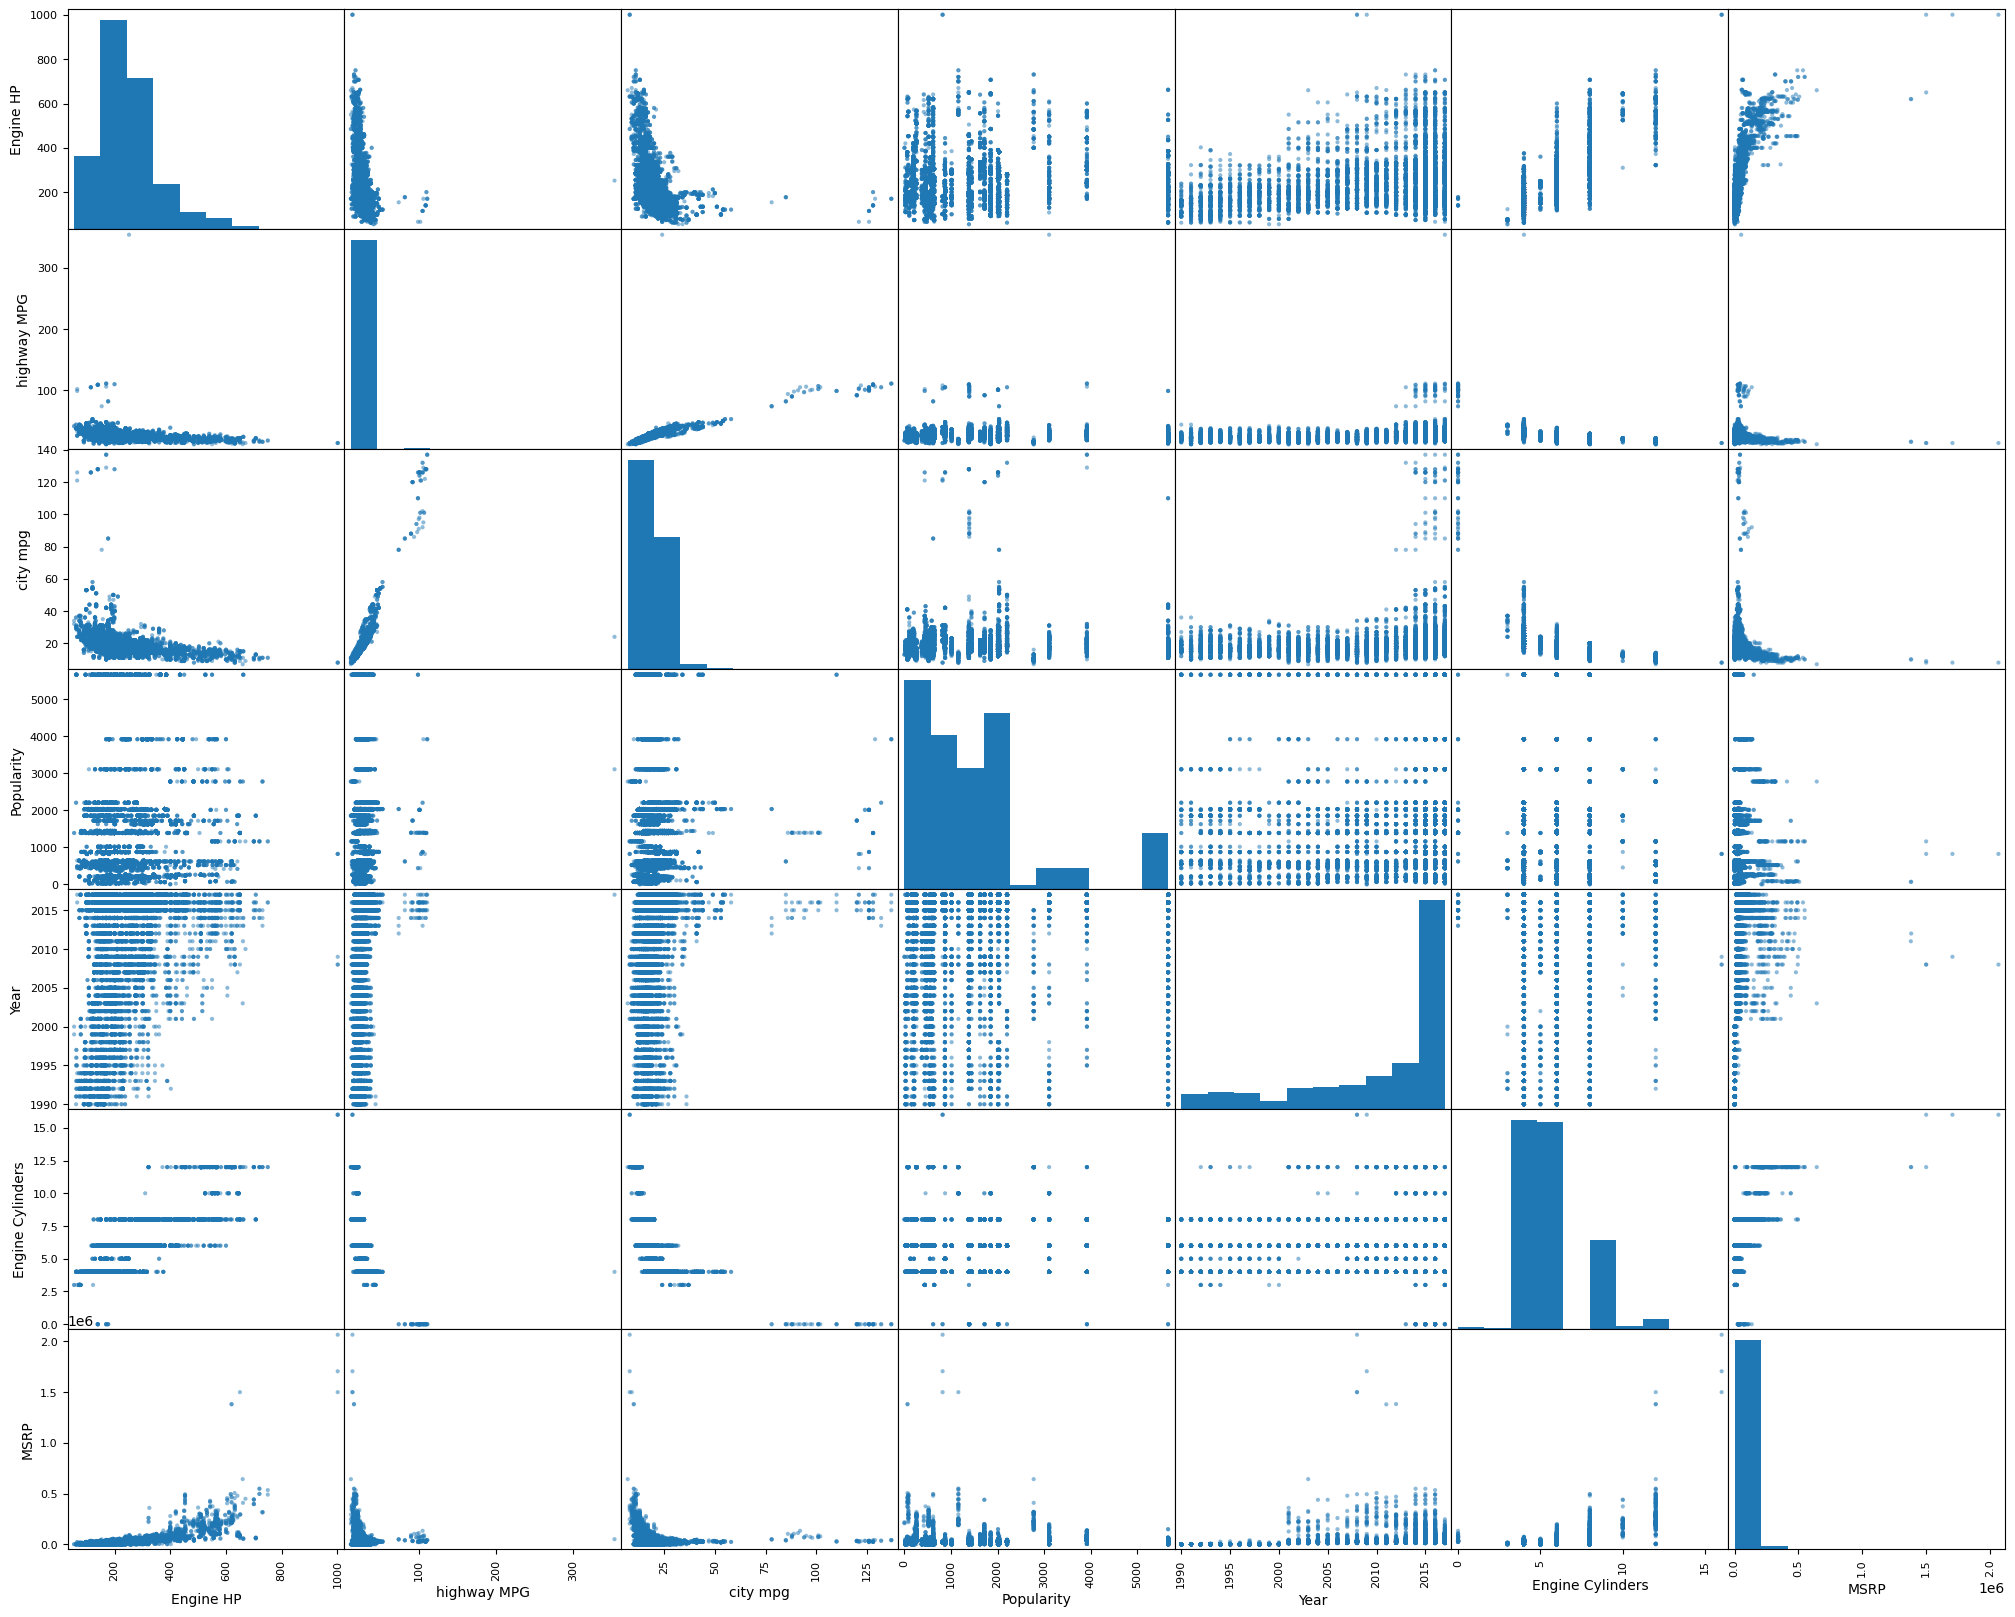

In [11]:
from pandas.plotting import scatter_matrix



attributes = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity','Year','Engine Cylinders','MSRP']
scatter_matrix(data[attributes], figsize=(25,20))
plt.show()



## Groupby with 'Make' feature


In [12]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min','max', 'mean'])


Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0